In [1]:
from scripts import support, insd, kuroda, nras, metrics, vectorization as v
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load base matrix
df = pd.read_excel("./data/NL_U2000_purchase.xlsx", skiprows=1, index_col=1)
df = df.iloc[0:-10, 1:-2].astype(np.float)
df = df.drop(columns=df.columns[[-9, -5, -2]])

# Load predicted matrix
pred_df = pd.read_excel("./data/NL_U2005_purchase.xlsx", skiprows=1, index_col=1)
pred_df = pred_df.iloc[0:-10, 1:-2].astype(np.float)
pred_df = pred_df.drop(columns=pred_df.columns[[-9, -5, -2]])
df_shape = pred_df.shape

df.shape, pred_df.shape

((59, 42), (59, 42))

In [3]:
df.head()

,"Agriculture, Hunting, Forestry and Fishing",Mining and Quarrying,"Food, Beverages and Tobacco",Textiles and Textile Products,"Leather, Leather and Footwear",Wood and Products of Wood and Cork,"Pulp, Paper, Paper , Printing and Publishing","Coke, Refined Petroleum and Nuclear Fuel",Chemicals and Chemical Products,Rubber and Plastics,...,Health and Social Work,"Other Community, Social and Personal Services",Private Households with Employed Persons,Financial intermediation services indirectly measured (FISIM),Final consumption expenditure by households,Final consumption expenditure by non-profit organisations serving households (NPISH),Final consumption expenditure by government,Gross fixed capital formation,Changes in inventories and valuables,Exports
Description,,,,,,,,,,,,,,,,,,,,,
"Products of agriculture, hunting and related services",3235.0,3.0,13478.0,12.0,15.0,2.0,9.0,2.0,43.0,21.0,...,149.0,328.0,0.0,0.0,4101.0,0.0,0.0,137.0,101.0,13381.0
"Products of forestry, logging and related services",0.0,0.0,1.0,0.0,0.0,134.0,11.0,0.0,18.0,0.0,...,0.0,5.0,0.0,0.0,128.0,0.0,0.0,0.0,2.0,214.0
Fish and other fishing products; services incidental of fishing,9.0,0.0,123.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,287.0,0.0,0.0,0.0,0.0,459.0
Coal and lignite; peat,11.0,9.0,0.0,0.0,0.0,0.0,1.0,23.0,9.0,0.0,...,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,399.0
Crude petroleum and natural gas; services incidental to oil and gas extraction excluding surveying,0.0,517.0,139.0,8.0,0.0,0.0,89.0,13297.0,1738.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,208.0,0.0,4859.0


In [4]:
# Sums of rows\columns
sums_rows = pred_df.sum(axis=1).values.reshape(-1, 1)
sums_cols = pred_df.sum(axis=0).values.reshape(-1, 1)

# Vectorization of matrixa
vect_a = v.tovector(df.values)
vect_a

array([[3235.],
       [   0.],
       [   9.],
       ...,
       [ 975.],
       [4440.],
       [   0.]])

In [5]:
sums_rows.shape, sums_cols.shape

((59, 1), (42, 1))

In [6]:
# Merge column of constraints
c = np.append(sums_rows, sums_cols, axis=0)
print(c.shape)

# Create matrix G of coefficients of constraints 
G = v.addrows(df_shape, sparsed=True) # Use "sparsed" parameter everywhere if want use fast sparsed matrix
G = v.addcolumns(df_shape, G, sparsed=True) # Use "sparsed" parameter everywhere if want use fast sparsed matrix
G.toarray()

(101, 1)


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [7]:
G.shape

(101, 2478)

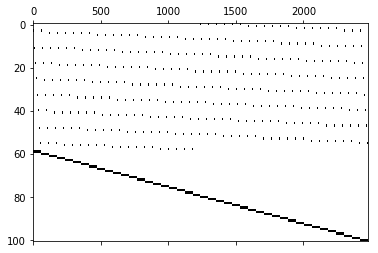

In [8]:
# Look on the distribution of 0s and 1s in matrix of coefficients G
plt.spy(G.toarray(), aspect='auto')

In [9]:
# Run method of projection - INSD(~201 ms) and got metrics and result matrix 
res_df = insd.insd(aa=vect_a, c=c, G=G, sparsed=True) # Use "sparsed" parameter everywhere if want use fast sparsed matrix
print("\nMetrics:")
metrics.get_values(res_df, pred_df.values, shape=df_shape)
print("\nResult matrix:")
pd.DataFrame(v.tomatrix(res_df, df_shape)).round(3).head()

Using license file C:\Users\Asus\gurobi.lic
Academic license - for non-commercial use only
Parameter BarConvTol unchanged
   Value: 1e-08  Min: 0.0  Max: 1.0  Default: 1e-08
Parameter BarQCPConvTol unchanged
   Value: 1e-06  Min: 0.0  Max: 1.0  Default: 1e-06
Changed value of parameter DualReductions to 0
   Prev: 1  Min: 0  Max: 1  Default: 1

Metrics:
N0 269
PSISTAT 0.018
RSQ 0.9891
MAPE 38.0864
SWAD 0.0456
WAPE 13.4562

Result matrix:


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,3289.446,3.914,13624.160,9.203,9.076,1.751,7.611,1.831,45.736,20.298,...,166.009,320.483,0.0,0.0,4573.882,0.0,0.0,131.216,113.320,16423.277
1,0.000,0.000,0.863,0.000,0.000,97.486,7.676,0.000,16.484,0.000,...,0.000,4.146,0.0,0.0,123.837,0.0,0.0,0.000,1.948,231.019
2,9.162,0.000,124.474,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,11.153,0.000,0.0,0.0,320.420,0.0,0.0,0.000,0.000,563.879
3,14.745,14.653,0.000,0.000,0.000,0.000,1.169,28.496,12.485,0.000,...,0.000,0.000,0.0,0.0,12.950,0.0,0.0,0.000,0.000,618.835
4,0.000,902.395,201.798,9.663,0.000,0.000,114.507,18034.372,2614.940,4.222,...,0.000,0.000,0.0,0.0,0.000,0.0,0.0,290.934,0.000,8106.266


In [12]:
# Run method of projection - Kuroda(~331 ms) and got metrics and result matrix
res_df = kuroda.kuroda(G=G, aa=vect_a, c=c, mtype=2, sparsed=True)
print("\nMetrics:")
metrics.get_values(res_df, pred_df.values, shape=df_shape)

Parameter BarConvTol unchanged
   Value: 1e-08  Min: 0.0  Max: 1.0  Default: 1e-08
Parameter BarQCPConvTol unchanged
   Value: 1e-06  Min: 0.0  Max: 1.0  Default: 1e-06
Parameter DualReductions unchanged
   Value: 1  Min: 0  Max: 1  Default: 1

Metrics:
N0 430
PSISTAT 0.0369
RSQ 0.9788
MAPE 64.4122
SWAD 0.0641
WAPE 17.4923


In [13]:
# Run method of projection - Kuroda(~331 ms) and got metrics and result matrix
res_df = kuroda.kuroda(G=G, aa=vect_a, c=c, mtype=3, sparsed=True)
print("\nMetrics:")
metrics.get_values(res_df, pred_df.values, shape=df_shape)

Parameter BarConvTol unchanged
   Value: 1e-08  Min: 0.0  Max: 1.0  Default: 1e-08
Parameter BarQCPConvTol unchanged
   Value: 1e-06  Min: 0.0  Max: 1.0  Default: 1e-06
Parameter DualReductions unchanged
   Value: 1  Min: 0  Max: 1  Default: 1

Metrics:
N0 379
PSISTAT 0.0329
RSQ 0.9832
MAPE 90.6479
SWAD 0.0576
WAPE 16.5191


In [14]:
# Run method of projection - NRAS(~181 ms) and got metrics and result matrix 
res_df = nras.nras(G=G, aa=vect_a, c=c, accuracy=0.001, limit = 1000, sparsed=True)
simple_metics = pd.DataFrame.from_dict({2005: metrics.get_values(res_df, pred_df.values, save=True, shape=df_shape)}, orient='index')
simple_metics

,N0,PSISTAT,RSQ,MAPE,SWAD,WAPE
2005,264,0.0173,0.9897,37.6294,0.0461,13.2037


In [23]:
def apply_method(initial_est, true_table, method=nras.nras):       
    # Create matrix G of coefficients of constraints 
    G = v.addrows(df_shape, sparsed=True)
    G = v.addcolumns(df_shape, G, sparsed=True) 
    
    sums_rows = true_table.sum(axis=1).reshape(-1, 1)
    sums_cols = true_table.sum(axis=0).reshape(-1, 1)
    c = np.append(sums_rows, sums_cols, axis=0)

    vect_a = v.tovector(initial_est)

    pred_table = method(G=G, aa=vect_a, c=c, accuracy=0.001, limit = 1000, sparsed=True)
    
    return v.tomatrix(pred_table, df_shape)

In [64]:
def get_metrics_for_series(true_tables, pred_tables):
    start_year = list(true_tables.keys())[0]
    final_year = list(true_tables.keys())[-1]

    for y in list(true_tables.keys())[1:]:
        true_table_y = true_tables[y]
        pred_table_y = pred_tables[y]
        
        res_metrics = metrics.get_values(pred_table_y, true_table_y, save=True, shape=df_shape)
        if y == list(true_tables.keys())[1]:
            constr_metrics = pd.DataFrame.from_dict({y: res_metrics}, orient='index')
        else:
            constr_metrics = pd.concat((constr_metrics, 
                                        pd.DataFrame.from_dict({y: res_metrics}, orient='index')), 
                                       axis=0)
        
    return constr_metrics

## Time series 2000-2005

In [65]:
nld_use_pur = pd.read_excel('./data/NLD_SUT_sep12.xlsx', sheet_name='USE_pur', skiprows=1, index_col=2)
nld_use_pur = nld_use_pur.drop(columns = nld_use_pur.columns[[-11, -7, -4, -2, -1, 1]])
nld_use_pur.head()

,year,"Agriculture, Hunting, Forestry and Fishing",Mining and Quarrying,"Food, Beverages and Tobacco",Textiles and Textile Products,"Leather, Leather and Footwear",Wood and Products of Wood and Cork,"Pulp, Paper, Paper , Printing and Publishing","Coke, Refined Petroleum and Nuclear Fuel",Chemicals and Chemical Products,...,Health and Social Work,"Other Community, Social and Personal Services",Private Households with Employed Persons,Financial intermediation services indirectly measured (FISIM),Final consumption expenditure by households,Final consumption expenditure by non-profit organisations serving households (NPISH),Final consumption expenditure by government,Gross fixed capital formation,Changes in inventories and valuables,Exports
desc,,,,,,,,,,,,,,,,,,,,,
"Products of agriculture, hunting and related services",1995.0,2842.425452,3.405633,13769.968154,15.325002,9.767046,1.332466,6.708554,2.682313,34.406523,...,119.139284,229.054292,0.0,0.0,3420.910209,0.0,0.0,271.207551,-152.057504,10485.388699
"Products of forestry, logging and related services",1995.0,0.000000,0.000000,0.464332,0.000000,0.405321,99.532501,12.917639,0.000000,13.446923,...,0.000000,4.253306,0.0,0.0,107.883544,0.0,0.0,0.000000,0.942485,88.423039
Fish and other fishing products; services incidental of fishing,1995.0,7.365762,0.000000,83.994495,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.536135,0.388583,0.0,0.0,206.404064,0.0,0.0,0.000000,0.000000,373.928273
Coal and lignite; peat,1995.0,3.492728,0.410508,1.180115,0.000000,0.000000,0.000000,0.000000,41.191025,0.000000,...,0.000000,0.000000,0.0,0.0,9.177887,0.0,0.0,0.000000,0.000000,149.571309
Crude petroleum and natural gas; services incidental to oil and gas extraction excluding surveying,1995.0,0.000000,247.524854,81.610168,4.530861,0.000000,0.000000,55.535043,5598.858806,890.831083,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,192.793500,-52.359423,2926.318675


In [84]:
def construct_time_series(true_tables):        
    start_year = list(true_tables.keys())[0]
    final_year = list(true_tables.keys())[-1]
    
    time_series = np.array([true_tables[start_year]])
    
    table_y = true_tables[start_year]
    
    for y in list(true_tables.keys())[1:]:
        true_table_y = true_tables[y]
        
        table_y = apply_method(table_y, true_table_y)        
        time_series = np.vstack((time_series, [table_y]))
        
    return dict(zip(list(true_tables.keys()), time_series))        

In [85]:
true_tables = dict.fromkeys(np.arange(2000, 2006, 1))
for y in range(2000, 2006):
    true_tables[y] = nld_use_pur[nld_use_pur.year == y].drop(columns='year').iloc[:-7].values

df_shape = true_tables[2000].shape
df_shape

(59, 42)

In [86]:
nld_time_series = construct_time_series(true_tables)
nld_time_series[2000].shape

(59, 42)

In [87]:
nld_metrics = get_metrics_for_series(true_tables, nld_time_series)
nld_metrics

,N0,PSISTAT,RSQ,MAPE,SWAD,WAPE
2001,245,0.0148,0.9905,30.6672,0.0455,12.1140
2002,244,0.0137,0.9909,30.6488,0.0445,12.3464
2003,263,0.0142,0.9914,31.4377,0.0435,12.2901
2004,265,0.0158,0.9903,36.8438,0.0435,12.8073
2005,278,0.0180,0.9888,38.4041,0.0493,13.7697


 ## Cycling method

$alpha = 1 \Rightarrow$ the initial estimate is always and only taken from the same-year solution of the prior cycle

$alpha = 0 \Rightarrow$ the initial estimate ignores any prior cycle and only ever considers same-cycle, prior-year values

In [88]:
def cycling_method(true_tables, max_cycles, alpha=0.5, eps=0.01):
    start_year = list(true_tables.keys())[0]
    final_year = list(true_tables.keys())[-1]
    
    a = np.expand_dims(list(construct_time_series(true_tables).values()), 0)
    a[0, -1] = true_tables[final_year]
    
    w = np.array([[0, alpha], [1 - alpha, 0]])
    
    tables_shape = true_tables[start_year].shape
    
    true_tables_arr = np.array(list(true_tables.values()))
    
    y = final_year - start_year
    for c in range(1, max_cycles):
        print('cycle no:', c)
        
        a_c = np.zeros((1, final_year - start_year + 1, tables_shape[0], tables_shape[1]))
        a_c[0, 0] = true_tables[start_year]
        a_c[0, -1] = true_tables[final_year]
        a = np.vstack((a, a_c))
        
        for i in range(final_year - start_year - 1):
            increment = 1 if c % 2 == 0 else -1
            y = y + increment
            initial_est = w[0, 0] * a[c, y] + w[0, 1] * a[c, y - increment] + \
                          w[1, 0] * a[c - 1, y] + w[1, 1] * a[c - 1, y - increment]
            a[c, y] = apply_method(initial_est, true_tables_arr[y])
        
        a_avg = np.average(a[-2:], axis=0)   
        if np.average(np.abs(a[c - 1] - a[c])) / np.average(a_avg) < eps:
            break
        
        y = y + increment
        
    return dict(zip(np.arange(start_year, final_year + 1), a_avg))

In [89]:
nld_time_series_cyc = cycling_method(true_tables, 10)
nld_time_series_cyc[2000].shape

cycle no: 1
cycle no: 2


(59, 42)

In [90]:
nld_metrics_cyc = get_metrics_for_series(true_tables, nld_time_series_cyc).iloc[:-1]
nld_metrics_cyc

,N0,PSISTAT,RSQ,MAPE,SWAD,WAPE
2001,231,0.0131,0.9914,29.5772,0.0432,11.5467
2002,220,0.0105,0.9928,27.9346,0.0397,11.0266
2003,210,0.0082,0.9948,25.3393,0.0344,9.6355
2004,147,0.0048,0.9970,22.2865,0.0247,7.3358


## Compare results

In [91]:
metrics_names = list(simple_metics.keys())
metrics_names

['N0', 'PSISTAT', 'RSQ', 'MAPE', 'SWAD', 'WAPE']

In [92]:
metrics_res_dict = {'1 nras': simple_metics, 
                    '2 year-by-year nras': nld_metrics,
                    '3 cycling nras': nld_metrics_cyc}

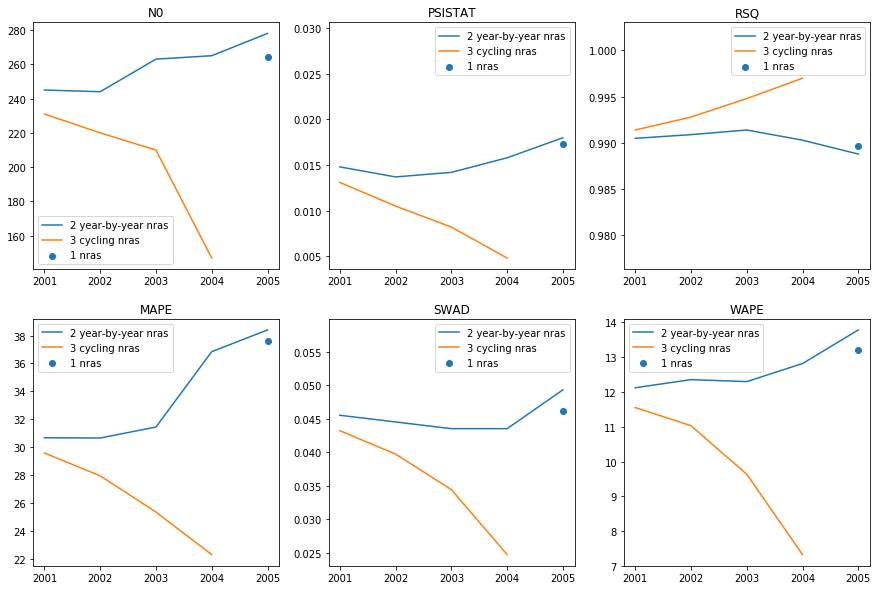

In [93]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
 
ind = 0
for i in range(ax.shape[0]):    
    for j in range(ax.shape[1]):        
        for method, metrics_res in metrics_res_dict.items():
            if method == '1 nras':
                ax[i, j].scatter(2005, metrics_res[metrics_names[ind]], label=method)
            else:
                ax[i, j].plot(metrics_res[metrics_names[ind]], label=method)
                
        ax[i, j].set_title(metrics_names[ind])
        ax[i, j].legend()
        ind += 1
        
plt.show()

## MTT II method

In [94]:
from sklearn.linear_model import LinearRegression as lr

In [95]:
def transform_mtt2(true_tables_arr):    
    transformed_tables = np.zeros((true_tables_arr.shape[0], 
                                   true_tables_arr.shape[1] - 1, 
                                   true_tables_arr.shape[2] - 1), dtype='float')
    
    for i in range(true_tables_arr.shape[0]):
        u = true_tables_arr[i, :-1, :-1]
        u = u / np.repeat(true_tables_arr[i, :-1, -1:], u.shape[1], axis=1)
        
        transformed_tables[i] = u
    
    return transformed_tables

In [96]:
def inverse_transform_mtt2(f, u):
    x = np.zeros((u.shape[0], u.shape[1] + 1), dtype='float')
    
    for j in range(u.shape[0]):
        for k in range(u.shape[1]):
            x[j, k] = u[j, k] * f[j] / (1 + np.sum(u[j]))
        x[j, -1] = f[j] / (1 + np.sum(u[j]))  
                           
    return x

In [154]:
def mtt2(true_tables, intermediate_shape):
    start_year = list(true_tables.keys())[0]
    final_year = list(true_tables.keys())[-1]
    years = list(true_tables.keys())
    
    true_tables_arr = np.array(list(true_tables.values()))
    
    tables_shape = true_tables[start_year].shape
    
    u_base = transform_mtt2(true_tables_arr[:2, : intermediate_shape[0], : intermediate_shape[1]])
    
    f = np.full_like(u_base[0], lr(), dtype=lr)
    for i in range(f.shape[0]):
        for j in range(f.shape[1]):
            x = np.array([[years[0] - start_year + 1], [years[1] - start_year + 1]])
            y = np.array([u_base[0][i, j], u_base[1][i, j]])
            f[i, j].fit(x, y)
            
    pred_tables_arr = np.zeros((true_tables_arr.shape[0], intermediate_shape[0] + 1, intermediate_shape[1] + 1), dtype='float')
    pred_tables_arr[:2] = true_tables_arr[:2]

    for i in range(2, pred_tables_arr.shape[0]):
        u = np.zeros_like(u_base[0], dtype='float')
        for j in range(u_base.shape[1]):
            for k in range(u_base.shape[2]):
                u[j, k] = f[j, k].predict(years[i] - start_year + 1)
                        
        intermediate_out = np.sum(true_tables_arr[i, : intermediate_shape[0], : intermediate_shape[1]], axis=0)
        intermediate_in = np.sum(true_tables_arr[i, : intermediate_shape[0]:, : intermediate_shape[1]], axis=1)
        gross_out = np.sum(true_tables_arr[i, :, : intermediate_shape[1]], axis=0)
        
        pred_tables_arr[i, : u.shape[0], : u.shape[1] + 1] = inverse_transform_mtt2(intermediate_out, u)

        pred_tables_arr[i, intermediate_shape[0] - 1, : intermediate_shape[1]] = intermediate_out - np.sum(pred_tables_arr[i, :, : intermediate_shape[1]], axis=0)

        pred_tables_arr[i, intermediate_shape[0],  : intermediate_shape[1]] = gross_out - intermediate_out
        pred_tables_arr[i, : intermediate_shape[0], intermediate_shape[1]] = gross_out - intermediate_in
        pred_tables_arr[i, -1, -1] = np.sum(pred_tables_arr[i, -1])
                
    return dict(zip(years, pred_tables_arr))

## Read IOTs

In [208]:
nld_iots = pd.read_excel('./data/NLD_niot_nov16.xlsx', sheet_name='National IO-tables', index_col=1).iloc[1:]
nld_iots.insert(loc=len(nld_iots.columns), column='CONS+GFCF+INVEN+EXP', 
                value=np.sum(nld_iots.iloc[:, -7:-1], axis=1))
nld_iots = nld_iots.drop(index=['II_fob', 'GO'], columns=nld_iots.columns[[1, -2, -3, -4, -5, -6, -7, -8]])
nld_iots.head()

,Year,Origin,A01,A02,A03,B,C10-C12,C13-C15,C16,C17,...,M73,M74_M75,N,O84,P85,Q,R_S,T,U,CONS+GFCF+INVEN+EXP
Code,,,,,,,,,,,,,,,,,,,,,
A01,2000.0,Domestic,1753.99,1.31649,0.224652,31.1758,5364.67,9.36103,7.55219,11.3785,...,4.07191,5.22226,85.2139,95.223,11.8915,105.09,50.9033,0,0,11370.928411
A02,2000.0,Domestic,0.177321,0.000100121,0.00804296,0.0248825,0.354213,0.0306843,0.00952202,0.0171612,...,0.11526,0.0336741,0.199639,2.1445,3.22127,0.217503,0.206934,0,0,125.332317
A03,2000.0,Domestic,14.1688,0,0.00329477,0.0351043,53.7341,0.140171,0.0188244,0.252089,...,0.111143,0.01979,0.172729,0.614748,0.173038,3.87022,3.00429,0,0,421.767255
B,2000.0,Domestic,0.0259569,0.000151905,0.000252787,0.00700919,0.0407679,0.00465444,0.00269454,0.00812395,...,0.0152198,0.0143156,0.0411927,0.12162,0.0161657,0.033974,0.0378205,0,0,10412.592640
C10-C12,2000.0,Domestic,1254.22,0.106643,0.646119,5.71816,4741.18,22.4355,5.30464,31.9123,...,14.6895,6.50057,26.0822,73.0877,19.4683,362.815,271.239,0,0,30380.914334


In [209]:
years = np.array([2005, 2006, 2007, 2008, 2009, 2010, 2011])
true_iots = dict.fromkeys(years)
for y in years:
    iot_y = nld_iots[nld_iots.Year == y].drop(columns='Year')
    va = pd.Series(np.sum(iot_y[iot_y.Origin != 'Domestic'], axis=0), name='IMP+VA')
    va.Origin = 'Domestic'
    iot_y = iot_y[iot_y.Origin == 'Domestic'].append(va).drop(columns=['Origin'])
    true_iots[y] = iot_y.values    
    true_iots[y][-1, -1] = np.sum(true_iots[y][-1, :-1])

df_shape = true_iots[2005].shape
df_shape

(57, 57)

### NRAS year by year

In [210]:
nld_iots_time_series = construct_time_series(true_iots)
nld_iots_time_series[2005].shape

(57, 57)

In [211]:
nld_iots_metrics = get_metrics_for_series(true_iots, nld_iots_time_series)
nld_iots_metrics

ERROR:root:Traceback (most recent call last):
  File "C:\Users\Asus\Google Диск\ДИПЛОМ\Disaggregation\scripts\metrics.py", line 187, in PsiStat
    inf1 = x_true / s
ZeroDivisionError: float division by zero

ERROR:root:Traceback (most recent call last):
  File "C:\Users\Asus\Google Диск\ДИПЛОМ\Disaggregation\scripts\metrics.py", line 187, in PsiStat
    inf1 = x_true / s
ZeroDivisionError: float division by zero

ERROR:root:Traceback (most recent call last):
  File "C:\Users\Asus\Google Диск\ДИПЛОМ\Disaggregation\scripts\metrics.py", line 187, in PsiStat
    inf1 = x_true / s
ZeroDivisionError: float division by zero

ERROR:root:Traceback (most recent call last):
  File "C:\Users\Asus\Google Диск\ДИПЛОМ\Disaggregation\scripts\metrics.py", line 187, in PsiStat
    inf1 = x_true / s
ZeroDivisionError: float division by zero

ERROR:root:Traceback (most recent call last):
  File "C:\Users\Asus\Google Диск\ДИПЛОМ\Disaggregation\scripts\metrics.py", line 187, in PsiStat
    inf1 = x_true / 

,N0,PSISTAT,RSQ,MAPE,SWAD,WAPE
2006,84,-1,0.9999,10.7270,0.0038,1.8703
2007,106,-1,0.9999,10.6873,0.0037,2.4989
2008,142,-1,0.9998,39.2762,0.0067,3.1790
2009,326,-1,0.9993,33.3687,0.0092,7.4678
2010,628,-1,0.9981,109.8966,0.0111,12.0515
2011,640,-1,0.9983,120.6650,0.0094,11.8943


### MTT II

In [212]:
for y, _ in true_iots.items():
    np.place(true_iots[y], true_iots[y] == 0, [1e-3])

In [213]:
nld_iots_time_series_mtt2 = mtt2(true_iots, (df_shape[0] - 1, df_shape[1] - 1))
nld_iots_time_series_mtt2[2005].shape

(57, 57)

In [214]:
nld_iots_metrics_mtt2 = get_metrics_for_series(true_iots, nld_iots_time_series_mtt2).drop(index=[2006])
nld_iots_metrics_mtt2

ERROR:root:Traceback (most recent call last):
  File "C:\Users\Asus\Google Диск\ДИПЛОМ\Disaggregation\scripts\metrics.py", line 188, in PsiStat
    loged1 = np.log(inf1)
AttributeError: 'float' object has no attribute 'log'

ERROR:root:Traceback (most recent call last):
  File "C:\Users\Asus\Google Диск\ДИПЛОМ\Disaggregation\scripts\metrics.py", line 188, in PsiStat
    loged1 = np.log(inf1)
AttributeError: 'float' object has no attribute 'log'

ERROR:root:Traceback (most recent call last):
  File "C:\Users\Asus\Google Диск\ДИПЛОМ\Disaggregation\scripts\metrics.py", line 188, in PsiStat
    loged1 = np.log(inf1)
AttributeError: 'float' object has no attribute 'log'

ERROR:root:Traceback (most recent call last):
  File "C:\Users\Asus\Google Диск\ДИПЛОМ\Disaggregation\scripts\metrics.py", line 188, in PsiStat
    loged1 = np.log(inf1)
AttributeError: 'float' object has no attribute 'log'

ERROR:root:Traceback (most recent call last):
  File "C:\Users\Asus\Google Диск\ДИПЛОМ\Disaggregatio

,N0,PSISTAT,RSQ,MAPE,SWAD,WAPE
2007,2424,-1,0.9936,1.316673e+07,0.0013,28.3969
2008,2566,-1,0.9936,1.488068e+07,0.0013,28.1522
2009,2374,-1,0.9917,1.463886e+07,0.0017,30.6420
2010,2374,-1,0.9927,1.372246e+07,0.0017,28.7993
2011,2604,-1,0.9929,1.500519e+07,0.0017,28.5321


## Results

In [215]:
metrics_names = list(simple_metics.keys())
metrics_names.remove('PSISTAT')
metrics_names

['N0', 'RSQ', 'MAPE', 'SWAD', 'WAPE']

In [216]:
metrics_res_dict = {'2 year-by-year nras': nld_iots_metrics,
                    '3 mtt 2': nld_iots_metrics_mtt2}

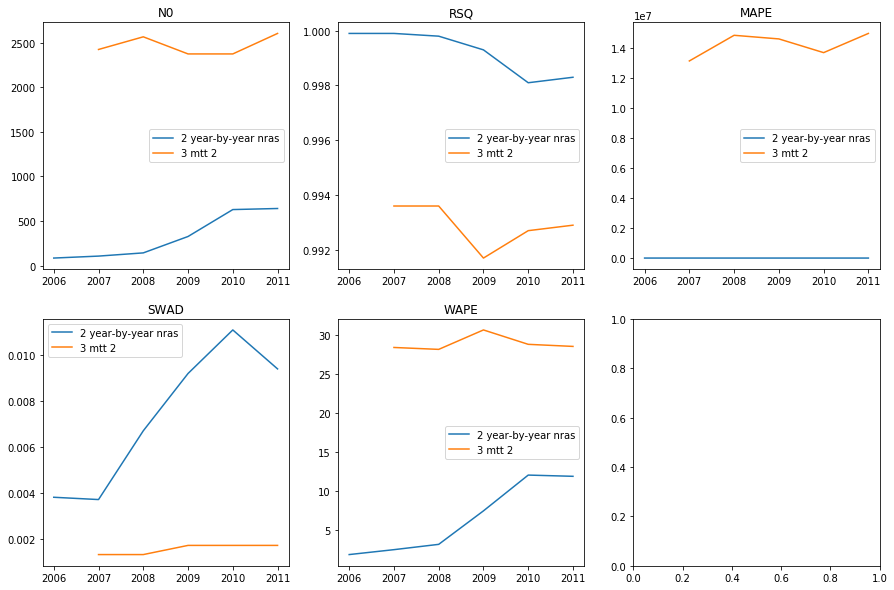

In [217]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
 
ind = 0
for i in range(ax.shape[0]):    
    for j in range(ax.shape[1]):   
        if i == 1 and j == 2:
            break
        for method, metrics_res in metrics_res_dict.items():
            if method == '1 nras':
                ax[i, j].scatter(2005, metrics_res[metrics_names[ind]], label=method)
            else:
                ax[i, j].plot(metrics_res[metrics_names[ind]], label=method)
                
        ax[i, j].set_title(metrics_names[ind])
        ax[i, j].legend()
        ind += 1
        
plt.show()

# Russian IOTs

In [188]:
nld_iots = pd.read_excel('./data/RUS_niot_nov16.xlsx', sheet_name='National IO-tables', index_col=1).iloc[1:]
nld_iots.insert(loc=len(nld_iots.columns), column='CONS+GFCF+INVEN+EXP', 
                value=np.sum(nld_iots.iloc[:, -7:-1], axis=1))
nld_iots = nld_iots.drop(index=['II_fob', 'GO'], columns=nld_iots.columns[[1, -2, -3, -4, -5, -6, -7, -8]])
nld_iots.head()

,Year,Origin,A01,A02,A03,B,C10-C12,C13-C15,C16,C17,...,M73,M74_M75,N,O84,P85,Q,R_S,T,U,CONS+GFCF+INVEN+EXP
Code,,,,,,,,,,,,,,,,,,,,,
A01,2000.0,Domestic,5633.86,0,0,97.8791,6805,67.8155,474.754,467.911,...,0,0,14.5261,318.55,107.373,168.169,11.6596,0,0,15877.541056
A02,2000.0,Domestic,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
A03,2000.0,Domestic,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
B,2000.0,Domestic,8.24755,0,0,325.9,14.3002,3.82574,5.82133,4.73403,...,0,0,5.76528,35.3073,4.76658,4.45101,59.6467,0,0,30024.727094
C10-C12,2000.0,Domestic,1245.85,0,0,11.0626,5001.37,8.20266,0.841176,4.75063,...,0,0,16.2587,586.893,312.441,491.629,4.91717,0,0,20993.879101


In [199]:
years = np.array([2005, 2006, 2007, 2008, 2009, 2010, 2011])
true_iots = dict.fromkeys(years)
for y in years:
    iot_y = nld_iots[nld_iots.Year == y].drop(columns='Year')
    va = pd.Series(np.sum(iot_y[iot_y.Origin != 'Domestic'], axis=0), name='IMP+VA')
    va.Origin = 'Domestic'
    iot_y = iot_y[iot_y.Origin == 'Domestic'].append(va).drop(columns=['Origin'])
    true_iots[y] = iot_y.values    
    true_iots[y][-1, -1] = np.sum(true_iots[y][-1, :-1])

df_shape = true_iots[2005].shape
df_shape

(57, 57)

### NRAS year by year

In [200]:
nld_iots_time_series = construct_time_series(true_iots)
nld_iots_time_series[years[0]].shape

(57, 57)

In [201]:
nld_iots_metrics = get_metrics_for_series(true_iots, nld_iots_time_series)
nld_iots_metrics

ERROR:root:Traceback (most recent call last):
  File "C:\Users\Asus\Google Диск\ДИПЛОМ\Disaggregation\scripts\metrics.py", line 187, in PsiStat
    inf1 = x_true / s
ZeroDivisionError: float division by zero

ERROR:root:Traceback (most recent call last):
  File "C:\Users\Asus\Google Диск\ДИПЛОМ\Disaggregation\scripts\metrics.py", line 187, in PsiStat
    inf1 = x_true / s
ZeroDivisionError: float division by zero

ERROR:root:Traceback (most recent call last):
  File "C:\Users\Asus\Google Диск\ДИПЛОМ\Disaggregation\scripts\metrics.py", line 187, in PsiStat
    inf1 = x_true / s
ZeroDivisionError: float division by zero

ERROR:root:Traceback (most recent call last):
  File "C:\Users\Asus\Google Диск\ДИПЛОМ\Disaggregation\scripts\metrics.py", line 187, in PsiStat
    inf1 = x_true / s
ZeroDivisionError: float division by zero

ERROR:root:Traceback (most recent call last):
  File "C:\Users\Asus\Google Диск\ДИПЛОМ\Disaggregation\scripts\metrics.py", line 187, in PsiStat
    inf1 = x_true / 

,N0,PSISTAT,RSQ,MAPE,SWAD,WAPE
2006,12,-1,0.9999,1.7082,0.0054,2.0425
2007,32,-1,0.9995,3.4580,0.0145,4.2486
2008,24,-1,0.9996,3.5136,0.0142,3.7613
2009,48,-1,0.9986,4.5294,0.0334,6.0743
2010,30,-1,0.9990,4.6502,0.0262,5.6721
2011,30,-1,0.9994,4.3289,0.0175,4.8522


### MTT II

In [202]:
for y, _ in true_iots.items():
    np.place(true_iots[y], true_iots[y] == 0, [1e-3])

In [203]:
nld_iots_time_series_mtt2 = mtt2(true_iots, (df_shape[0] - 1, df_shape[1] - 1))
nld_iots_time_series_mtt2[years[0]].shape

(57, 57)

In [204]:
nld_iots_metrics_mtt2 = get_metrics_for_series(true_iots, nld_iots_time_series_mtt2).drop(index=[years[1]])
nld_iots_metrics_mtt2

ERROR:root:Traceback (most recent call last):
  File "C:\Users\Asus\Google Диск\ДИПЛОМ\Disaggregation\scripts\metrics.py", line 188, in PsiStat
    loged1 = np.log(inf1)
AttributeError: 'float' object has no attribute 'log'

ERROR:root:Traceback (most recent call last):
  File "C:\Users\Asus\Google Диск\ДИПЛОМ\Disaggregation\scripts\metrics.py", line 188, in PsiStat
    loged1 = np.log(inf1)
AttributeError: 'float' object has no attribute 'log'

ERROR:root:Traceback (most recent call last):
  File "C:\Users\Asus\Google Диск\ДИПЛОМ\Disaggregation\scripts\metrics.py", line 188, in PsiStat
    loged1 = np.log(inf1)
AttributeError: 'float' object has no attribute 'log'

ERROR:root:Traceback (most recent call last):
  File "C:\Users\Asus\Google Диск\ДИПЛОМ\Disaggregation\scripts\metrics.py", line 188, in PsiStat
    loged1 = np.log(inf1)
AttributeError: 'float' object has no attribute 'log'

ERROR:root:Traceback (most recent call last):
  File "C:\Users\Asus\Google Диск\ДИПЛОМ\Disaggregatio

,N0,PSISTAT,RSQ,MAPE,SWAD,WAPE
2007,2038,-1,0.9794,4.400954e+07,0.0033,48.4443
2008,1986,-1,0.9797,5.581595e+07,0.0033,48.0789
2009,1984,-1,0.9784,4.359145e+07,0.0033,50.0930
2010,2020,-1,0.9783,5.256738e+07,0.0034,49.8171
2011,1974,-1,0.9785,6.472995e+07,0.0034,49.3597


## Results

In [205]:
metrics_names = list(simple_metics.keys())
metrics_names.remove('PSISTAT')
metrics_names

['N0', 'RSQ', 'MAPE', 'SWAD', 'WAPE']

In [206]:
metrics_res_dict = {'2 year-by-year nras': nld_iots_metrics,
                    '3 mtt 2': nld_iots_metrics_mtt2}

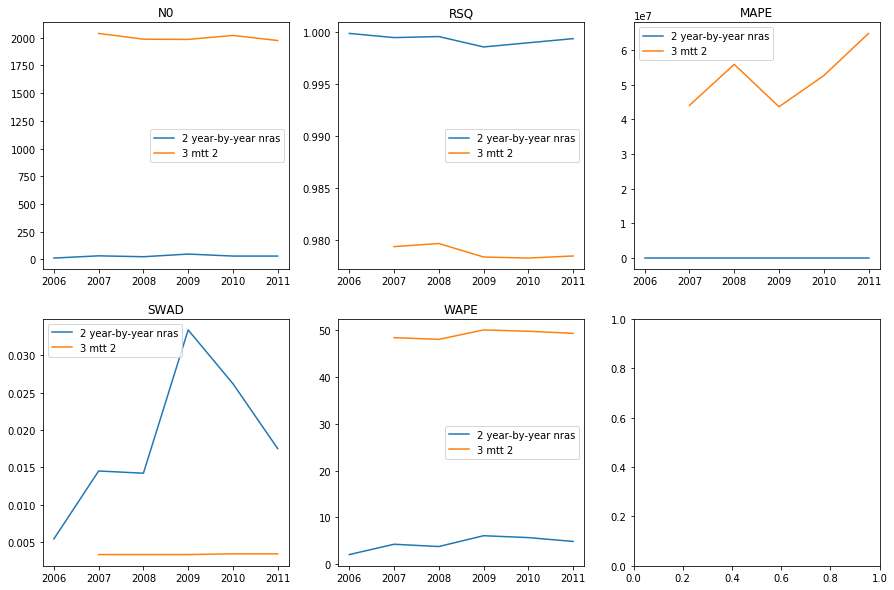

In [207]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
 
ind = 0
for i in range(ax.shape[0]):    
    for j in range(ax.shape[1]):   
        if i == 1 and j == 2:
            break
        for method, metrics_res in metrics_res_dict.items():
            if method == '3 cycling nras':
                ax[i, j].scatter(2011, metrics_res[metrics_names[ind]], label=method)
            else:
                ax[i, j].plot(metrics_res[metrics_names[ind]], label=method)
                
        ax[i, j].set_title(metrics_names[ind])
        ax[i, j].legend()
        ind += 1
        
plt.show()